# Part 4: Building a Model
---

In [21]:
# imports
import statsmodels.api as sm
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

Build a regression model.
___

## Multivariate Linear Regression

Multivariate Linear Regression was chosen to try to demonstrates a relationship between the number of bikes in a particular location and the review_count, rating and  price characteristics of the POIs in that location.

Multivariate Multiple Linear regression consists of one continuous dependent variable and more than one independent variable. We will use free_bikes as our dependent variable ($y$) and review_count, rating and price as our independent variables ($x_1$ and $x_2$).

To build the model, we will have to group the dataframe by bike station and have the mean of the review_count, rating, and price of all points of interest of each bike station.

### Load and view the dataset

In [2]:
full_df = pd.read_csv('../data/bike_stations_hamilton_full_poi.csv', index_col=0)

grouped_by_staion = full_df[['station_id', 'empty_slots','free_bikes','review_count', 'rating', 'price']].groupby(by='station_id').mean()

grouped_by_staion.head()

,empty_slots,free_bikes,review_count,rating,price
station_id,,,,,
024a3edf037cb411d16acc08a7fcb954,18.0,6.0,43.65,3.975,1.25
0265404843dccbf9378ce9d56a570914,8.0,1.0,72.60,3.950,1.80
05e87b8200ed015e7fb61865b83e3013,14.0,3.0,71.60,4.025,1.70
05fffdca01b4d886a823b025b6a04080,6.0,3.0,19.95,3.925,0.70
0688d3f9058eef55341330755b661c61,5.0,7.0,15.20,3.150,0.90


In [10]:
grouped_by_staion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 024a3edf037cb411d16acc08a7fcb954 to fe1507c344d73062f43e013bdd6139a3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   empty_slots   145 non-null    float64
 1   free_bikes    145 non-null    float64
 2   review_count  143 non-null    float64
 3   rating        143 non-null    float64
 4   price         145 non-null    float64
dtypes: float64(5)
memory usage: 10.9+ KB


In [15]:
# filling with 0 the two bike stations without any poi
grouped_by_staion[['review_count', 'rating']] = grouped_by_staion[['review_count', 'rating']].fillna(0)

Use pairplot to informally check if there is linearity between the numerical variables.

/Users/nickolasstello/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


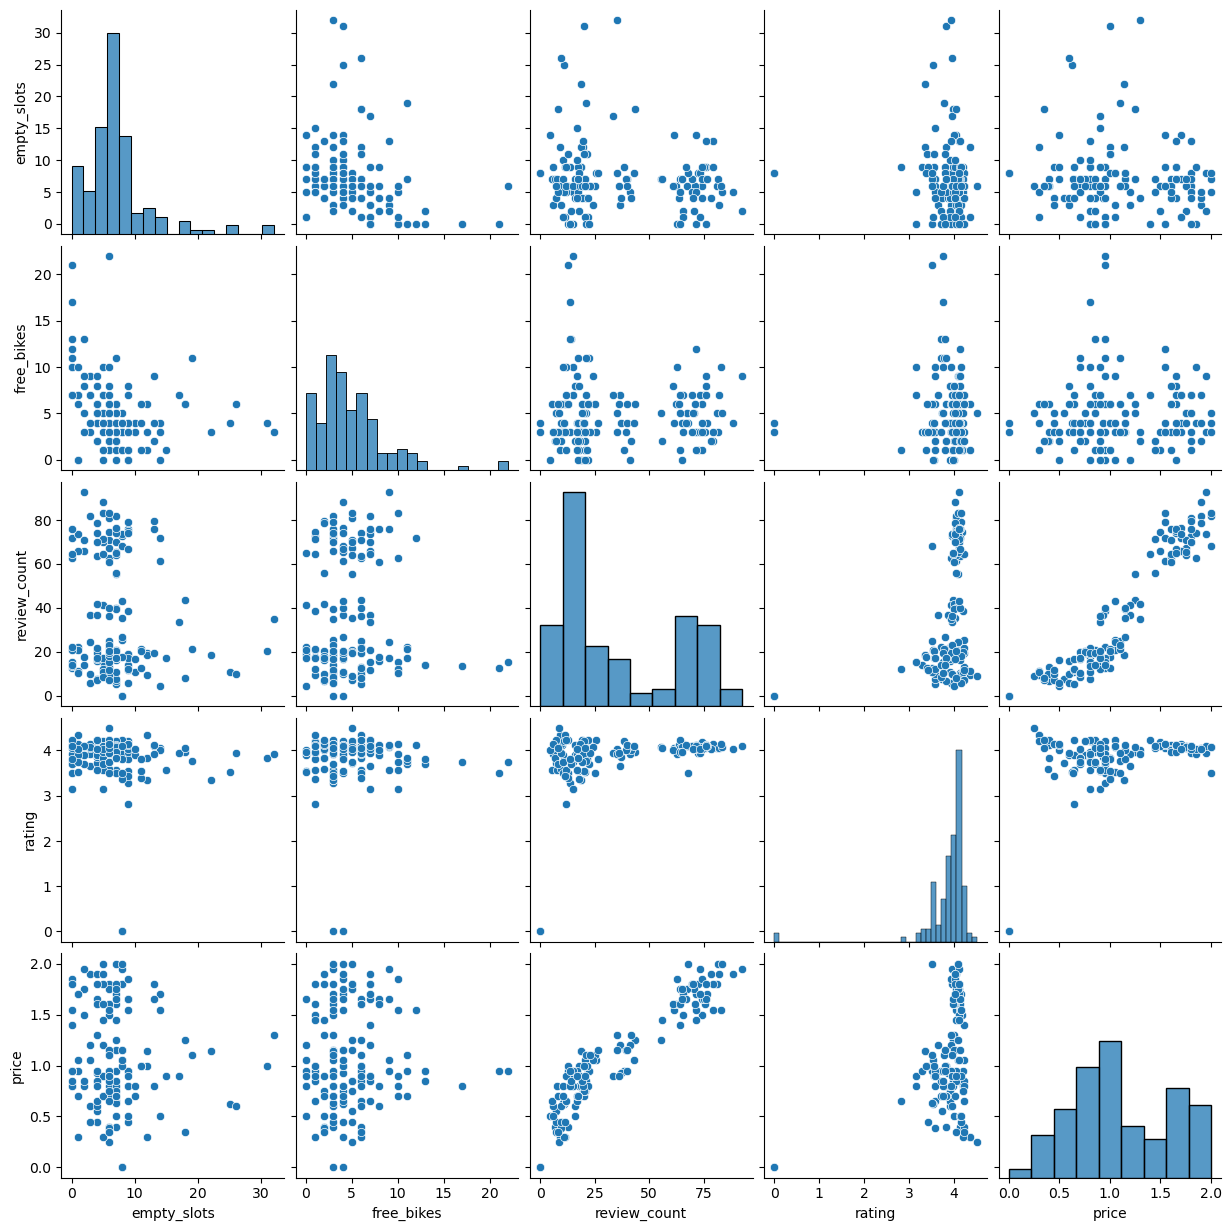

In [19]:
sns.pairplot(data=grouped_by_staion)
plt.show()

It seems like all the numerical variables are not correlated with one another. Let's check this by looking at the correlations.

In [26]:
grouped_by_staion.corr(numeric_only=True)

,empty_slots,free_bikes,review_count,rating,price
empty_slots,1.000000,-0.262178,-0.122426,-0.075755,-0.084718
free_bikes,-0.262178,1.000000,-0.016359,-0.006361,0.041727
review_count,-0.122426,-0.016359,1.000000,0.325802,0.937244
rating,-0.075755,-0.006361,0.325802,1.000000,0.317917
price,-0.084718,0.041727,0.937244,0.317917,1.000000


Check if the correlations are significant by using Pearson's correlation coefficient test.

In [25]:
print('Correlations between dependent variable and independent variables')
stat, p1 = scipy.stats.pearsonr(grouped_by_staion['review_count'], grouped_by_staion['free_bikes'])
stat, p2 = scipy.stats.pearsonr(grouped_by_staion['rating'], grouped_by_staion['free_bikes'])
stat, p3 = scipy.stats.pearsonr(grouped_by_staion['price'], grouped_by_staion['free_bikes'])
print(p1, p2, p3, '\n')      
      
print('Correlations between all independent variables')
stat, p4 = scipy.stats.pearsonr(grouped_by_staion['review_count'], grouped_by_staion['rating'])
stat, p5 = scipy.stats.pearsonr(grouped_by_staion['review_count'], grouped_by_staion['price'])
stat, p6 = scipy.stats.pearsonr(grouped_by_staion['rating'], grouped_by_staion['price'])
print(p4, p5, p6)

Correlations between dependent variable and independent variables
0.8451606694876558 0.9394715845119775 0.6182555808142228 

Correlations between all independent variables
6.36404095591607e-05 2.6146760586279714e-67 9.752010268679791e-05


All p-values are >0.05 when testing the correlations between the dependent variable and the independent variables, so we can conclude we don't have a significant correlation.

When testing the correlations between all independent variables, all p-values are <0.05.

### Building the Model

In [16]:
y = grouped_by_staion['free_bikes']
X = grouped_by_staion[['review_count', 'rating', 'price']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept
X.head()

,const,review_count,rating,price
station_id,,,,
024a3edf037cb411d16acc08a7fcb954,1.0,43.65,3.975,1.25
0265404843dccbf9378ce9d56a570914,1.0,72.60,3.950,1.80
05e87b8200ed015e7fb61865b83e3013,1.0,71.60,4.025,1.70
05fffdca01b4d886a823b025b6a04080,1.0,19.95,3.925,0.70
0688d3f9058eef55341330755b661c61,1.0,15.20,3.150,0.90


Provide model output and an interpretation of the results.
___

In [17]:
model = sm.OLS(y, X) #instantiate
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.309
Date:                Wed, 06 Dec 2023   Prob (F-statistic):              0.274
Time:                        10:53:52   Log-Likelihood:                -388.18
No. Observations:                 145   AIC:                             784.4
Df Residuals:                     141   BIC:                             796.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.6021      2.332      1.545   

#### Output

- **Adj. R-squared**: This multivariate model explains only 0.6% of the variations in the data. This model doesn't seem to be a good fit.

- **Prob (F-statistic)**: The P-value for the hypothesis test is greater than 0, so we fail to reject the null hypothesis. The independent variables do not affect the dependent variable.
    
- **coef**: We can tell from this output that the average POI price has the strongest positive impact on the number of bikes per station, whereas review_count has the largest negative impact on on the number of bikes per station.

- **P>|t|**: A p-value of less than 0.05 is considered to be statistically significant. This regression output shows that all p-values are >0.05. In other words,review_count, rating, and price attributes of a point of interest do not impact the number of bikes in a bike station.